## What are Gaussian mixture models?

Gaussian mixture models aim to find the data-generating processes by assuming that the data is generated by a mixture of several Gaussian distributions. Although you may not realize it, you already know all about *Gaussian distributions*—they're normal distributions! Hence, GMM aims to find the normal distributions that generated your data. More specifically, GMM searches for the Gaussian distributions for each of the clusters in the data. Because the full data is the combination of all of the clusters, GMM models the data as a mixture of the Gaussian distributions, where the number of these distributions is equal to the number of clusters in the data.

The assumption of your data being generated by a mix of normal distributions may sound too strong. But recall the central limit theorem, which states that if you have enough samples from a population, the means of the samples converge to a normal distribution no matter the original distribution of the population. Counting on this theorem, GMM searches for the means and the standard deviations of the Gaussian distributions. More formally, each observation $x_i$ is assumed to be drawn from the mixture of these Gaussians:

$$p(x_i)=\sum_{c=1}^{k}\phi_c\mathcal{N}(\mu_c,\sigma_c)$$

Where $\sum_{c=1}^{k}\phi_c=1$.

GMM treats each data point $x_i$ as a linear combination of the $k$ Gaussians. Each Gaussian $c$ has a weight that is denoted by $\phi_c$, which represents the strength of that Gaussian. GMM imposes a constraint on the weights such that they all sum up to `1`.

Notice that you need to determine three types of parameters. These are the weights of each Gaussian ($\phi_c$), the means of each Gaussian ($\mu_c$), and the covariances of each Gaussian ($\sigma_c$). Next, look at the GMM algorithm and explore how to estimate these parameters.

## The GMM algorithm using expectation maximization

To estimate the parameters $\phi_c$, $\mu_c$, and $\sigma_c$, GMM uses an algorithm called *expectation maximization* (EM). EM is a well-known algorithm that dates back to 1977 and can be used in several other contexts, not just in GMM. You can see how GMM uses EM in the following algorithm steps:

1. **Initialization:** The first step is to initialize the parameters of each Gaussian. Random initialization is a common choice. But more guided initialization methods are also available. For example, one can initialize the $\mu_c$ of each Gaussian by running k-means first and then using the centroids of the k-means solution as the initial values of $\mu_c$. The other parameters can be initialized as follows:

    $$\phi_c = \frac{Number\: of\: points\: in\: the\: c^{th}\: cluster}{Total\: number\: of\: points\: in\: the\: data}$$

    $$\sigma_c = covariance(c^{th}\: cluster)$$

    After this initialization step, GMM repeats the following steps until the changes in the parameters of the distributions are small enough or the log-likelihood value reaches a threshold where it stops increasing.

2. **Estimation:** In this step, the ownership of each data point is calculated given the current values of the parameters of the Gaussians. For each data point $x_i$, you compute the probabilities of that point belongs to a particular cluster $c$. In this step, you compute the probabilities by using the parameters of the Gaussians as follows:

    $$\lambda(x_{ic})=\frac{\phi_c\mathcal{N}(x_i|\mu_c,\sigma_c)}{\sum_{j=1}^{k}\phi_j\mathcal{N}(x_i|\mu_j,\sigma_j)}$$

    $\lambda(x_{ic})$ is called *responsibility*, and it indicates how much the Gaussian $c$ is responsible in generating $x_i$.

3. **Maximization:** In this step, the parameters of the Gaussians are updated, given the current ownership probabilities of the data points, to maximize the log-likelihood of the data. In updating the parameters, you use all the data points in the data, and weight them according to the probability assigned to that point by a particular Gaussian. For example, you update the mean of the Gaussian $c$ by taking the average of the weighted sum of the data points where the weights are the probabilities assigned by the Gaussian $c$. In the limit, this maximizes the probabilities of data points within the clusters. More formally, the parameters are updated as follows:

    $$\mu_c^{new} = \frac{1}{N_c}\sum_{i=1}^{N}\lambda(x_{ic})x_i$$

    $$N_c = \sum_{i=1}^{N}\lambda(x_{ic})$$

    $$\sigma_c^{new} = \frac{1}{N_c}\sum_{i=1}^{N}\lambda(x_{ic})(x_i - \mu_c^{new})(x_i - \mu_c^{new})^T$$

    $$\phi_c^{new} = \frac{N_c}{N}$$

4. **Evaluation of the log-likelihood:** The last step is to evaluate the log-likelihood of the data. Log-likelihood measures the probability of the data being generated by the Gaussians with the parameters calculated in the previous steps. GMM's goal is to maximize this log-likelihood:

    $$ln(p(X | \phi_c, \mu_c, \sigma_c)) = \sum_{i=1}^{N}ln(\sum_{c=1}^{k}\phi_c\mathcal{N}(x_i|\mu_c,\sigma_c))$$

    The algorithm stops if the log-likelihood reaches a threshold where it stops increasing, or if the changes in the parameters of the distributions become very small. Otherwise, GMM iterates over by going back to the estimation step described above.

The animation below demonstrates how the algorithm works on an example dataset:

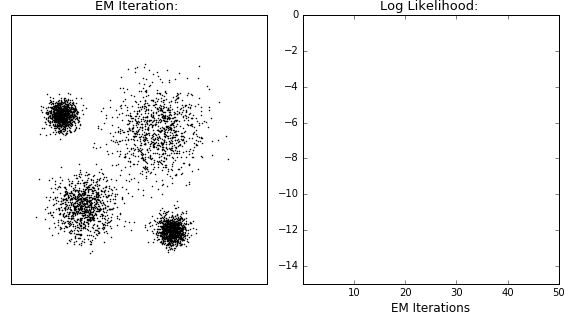

## Assumptions of GMM

GMM makes two important assumptions:

- That there are $k$ distributions that generate the data. In effect, this is equivalent to saying that there are exactly $k$ clusters in the data.

- That all of these $k$ distributions are Gaussians. However, GMM doesn't put constraints on the parameters of these Gaussians; it estimates them such that the likelihood of the data being generated by these $k$ Gaussians is maximized.

If one of the assumptions fails to hold in your data, then GMM may produce clusters that aren't useful. Even though GMM has these two assumptions, it's still considered a fairly flexible clustering method. For example, compare this to the assumptions of k-means that you saw in the *K-means* lesson. Notice that GMM releases two of these assumptions; GMM doesn't assume that the clusters are isotropic and have similar variances. From this perspective, you can even think of k-means as a special case of GMM.

## Speed

The time complexity of the GMM algorithm is $O(knT)$, where $T$ denotes the number of iterations, $k$ denotes the number of Gaussians, and $n$ denotes the number of observations. If you remember the time complexity of the k-means algorithm, you may notice that the time complexities of the GMM and k-means are the same. However, in practice, the termination conditions of GMM are hard to determine. And in theory, it can take an infinitely long time to converge. This is because GMM will try to optimize its estimates even though the gain is infinitesimally small. So, it's usually best to restrict the number of iterations of the algorithm by setting `max_iter` parameter of the `GaussianMixture` to a reasonable number. The case for k-means is different, because k-means only tries to find the centroids, and there are $2^k$ alternatives at most. In practice, it takes a few dozen steps, but k-means' number of iterations is naturally limited.

As you can see, GMM can become an expensive algorithm in terms of computational time. Hence, applying it to very high-dimensional datasets may take too long to converge. So when you have very high-dimensional datasets, you may consider applying a dimensionality-reduction technique first to reduce the dimension of the data before applying GMM.

## GMM in action

Now, run the GMM on the *Iris* dataset. Recall that previous clustering algorithms that were discussed in this module were run by using the `cluster` module of the scikit-learn. However, GMM is available through another module of scikit-learn: `mixture`. In general, this module implements several Gaussian mixture models.

First, import the packages that you'll use:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

As usual, load the *Iris* dataset from scikit-learn's `datasets` module. GMM is also sensitive to the scale of the data. So, standardize your variables before fitting GMM:

In [2]:
# Loading the data from scikit-learn's datasets module
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Now, define a `GaussianMixture` object with `n_components=3`, because you have three types of flowers in the dataset. You can play with this parameter to see how GMM forms the clusters for different values of this parameter:

In [3]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

To visualize the results, apply PCA and use the first two components. In the plot below, the numbers show the cluster that each observation has been assigned to by the algorithm. The colors denote the true classes.

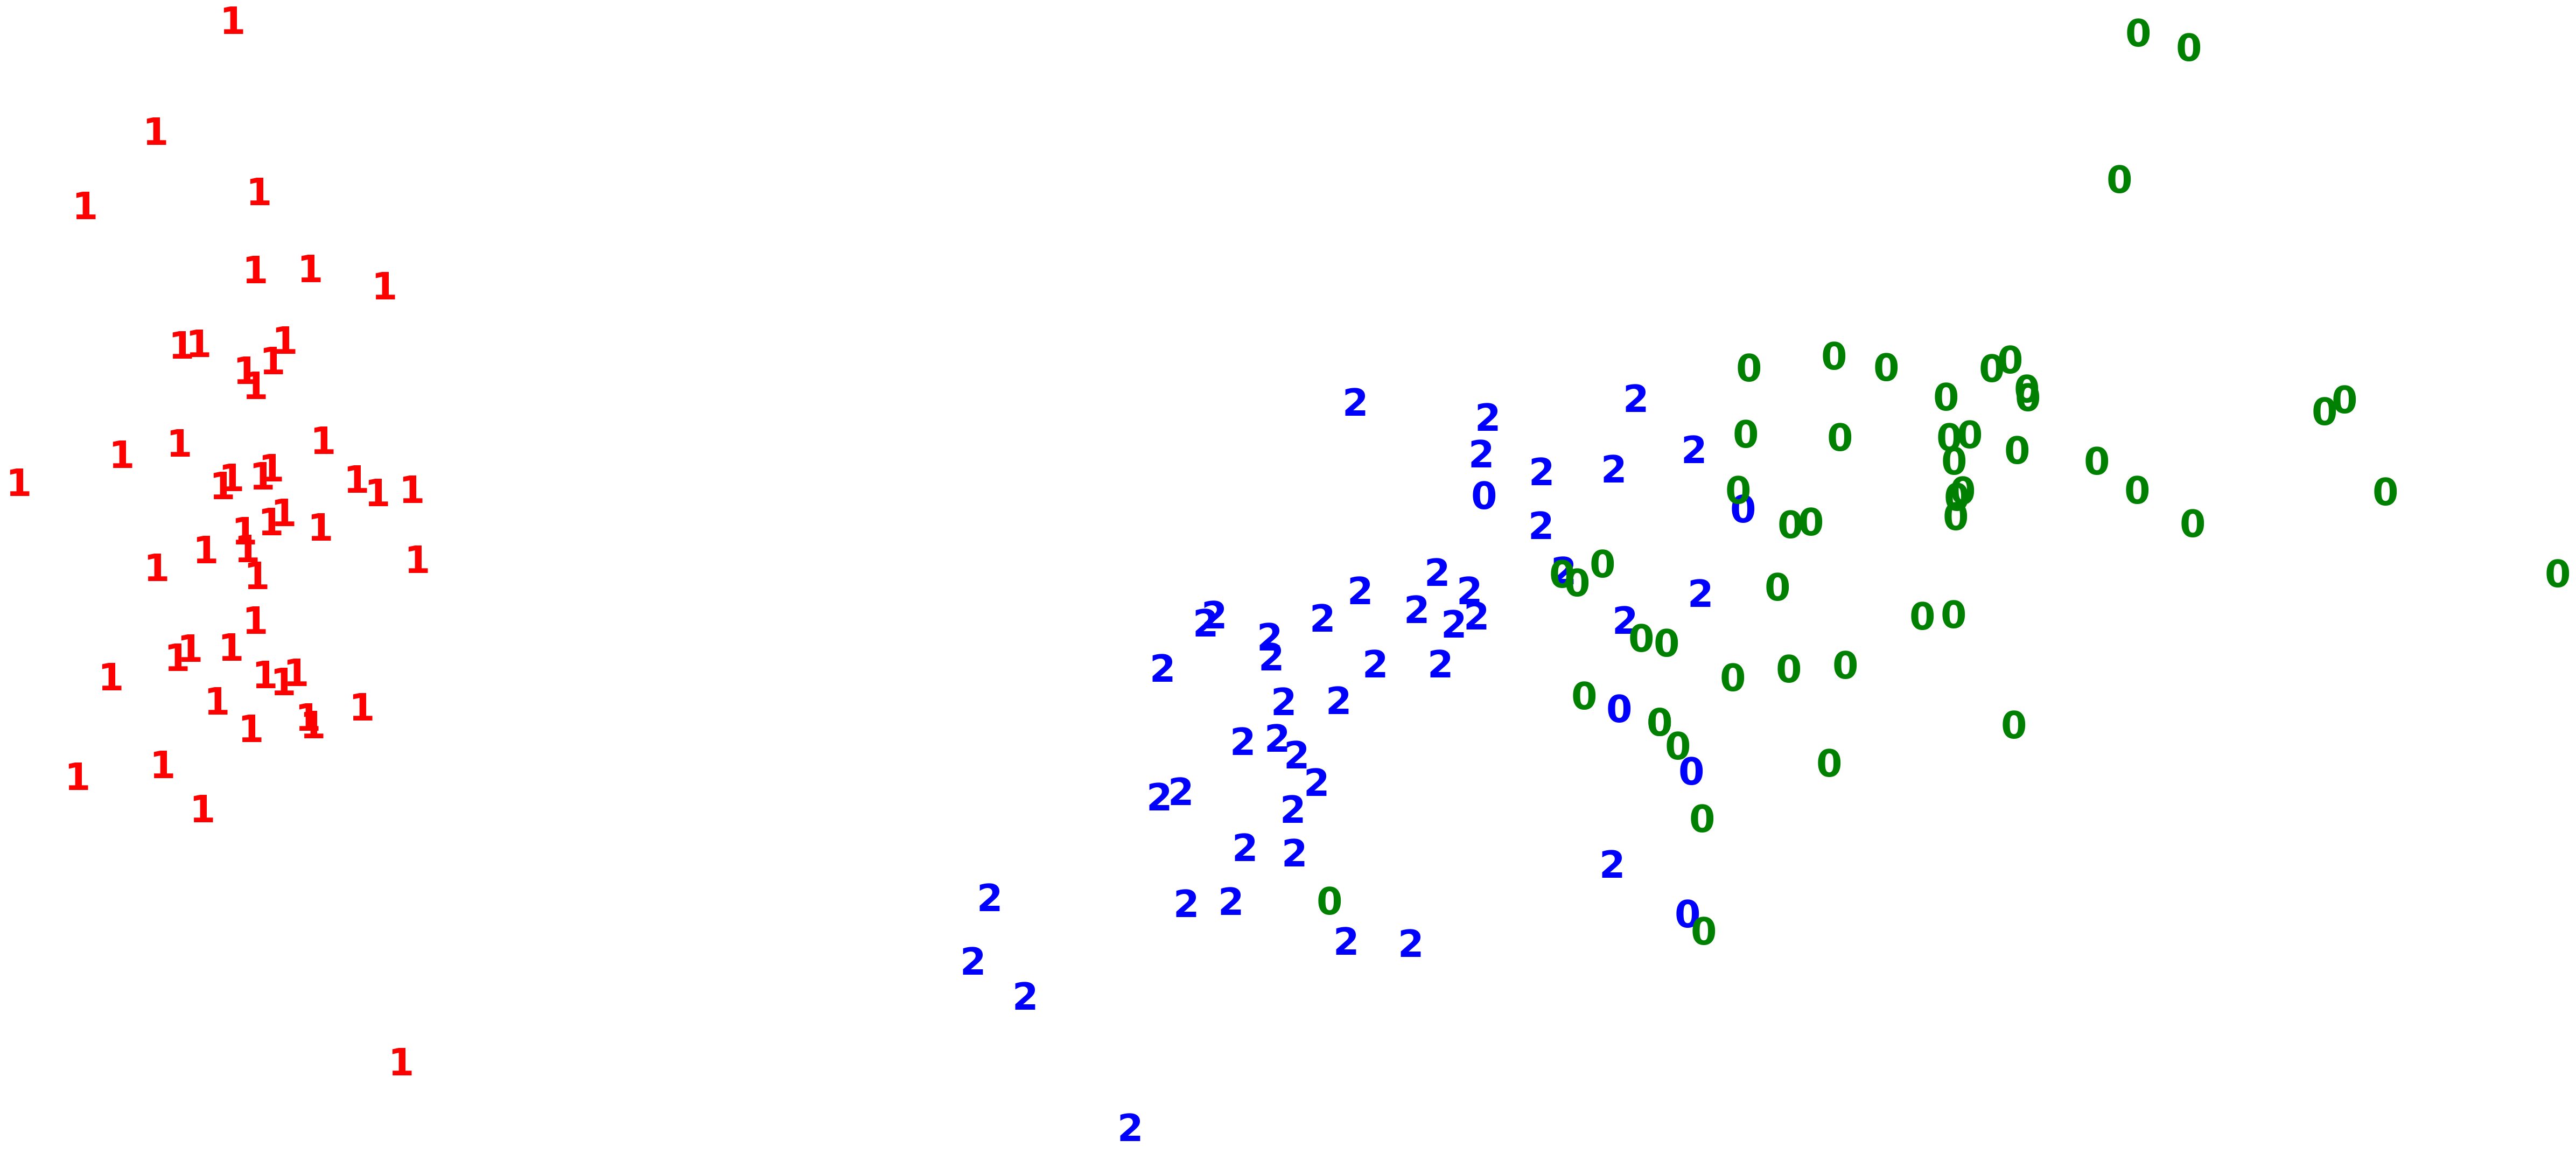

In [4]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

It seems that the GMM solution even separated the two linearly nonseparable classes. Now, get the ARI and silhouette scores of this solution:

In [5]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhouette score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.9038742317748124
The silhouette score of the GMM solution: 0.37416491866541235


According to the ARI, the GMM solution is very close to `1`, which indicates that it did a fairly good job! The ARI score of the GMM solution is by far the highest among the clustering techniques that you've applied so far in this module. However, this isn't a fair comparison. The scikit-learn implementation of the `GaussianMixture` uses k-means in the initialization of the means of the Gaussians. So, you should also give credit to k-means; this time, GMM is built on its shoulders.

Now, tabulate the contingency table to see how well the GMM performed. But before that, relabel the clusters to make it easier to read the contingency table:

In [6]:
# Relabeling
clusters = np.array([2 if x == 1 else 1 if x==2 else x for x in clusters])

pd.crosstab(y,clusters)

col_0,0,1,2
row_0,,,
0,0,0,50
1,5,45,0
2,50,0,0


Only five observations seem to be assigned to the wrong cluster! But how about the silhouette score? It's only `0.37`, and it's the lowest among the clustering techniques that you've applied so far in this module. This is due to the fact that the two classes among the three classes are not linearly separable, and they are very close to each other in the high-dimensional space. The more that an algorithm distinguishes these two classes, the lower its silhouette score is. Hence, measuring the performances of the clustering algorithms on the *Iris* dataset using the silhouette score is misleading. Confirming this, recall that in the previous lesson, DBSCAN achieved the highest silhouette score with a two-cluster solution!

Last but not least, look at how the soft-clustering aspect of the GMM works. Below, draw the same graph as above, but this time, resize the points according to the highest probability assigned to them by the winning cluster:

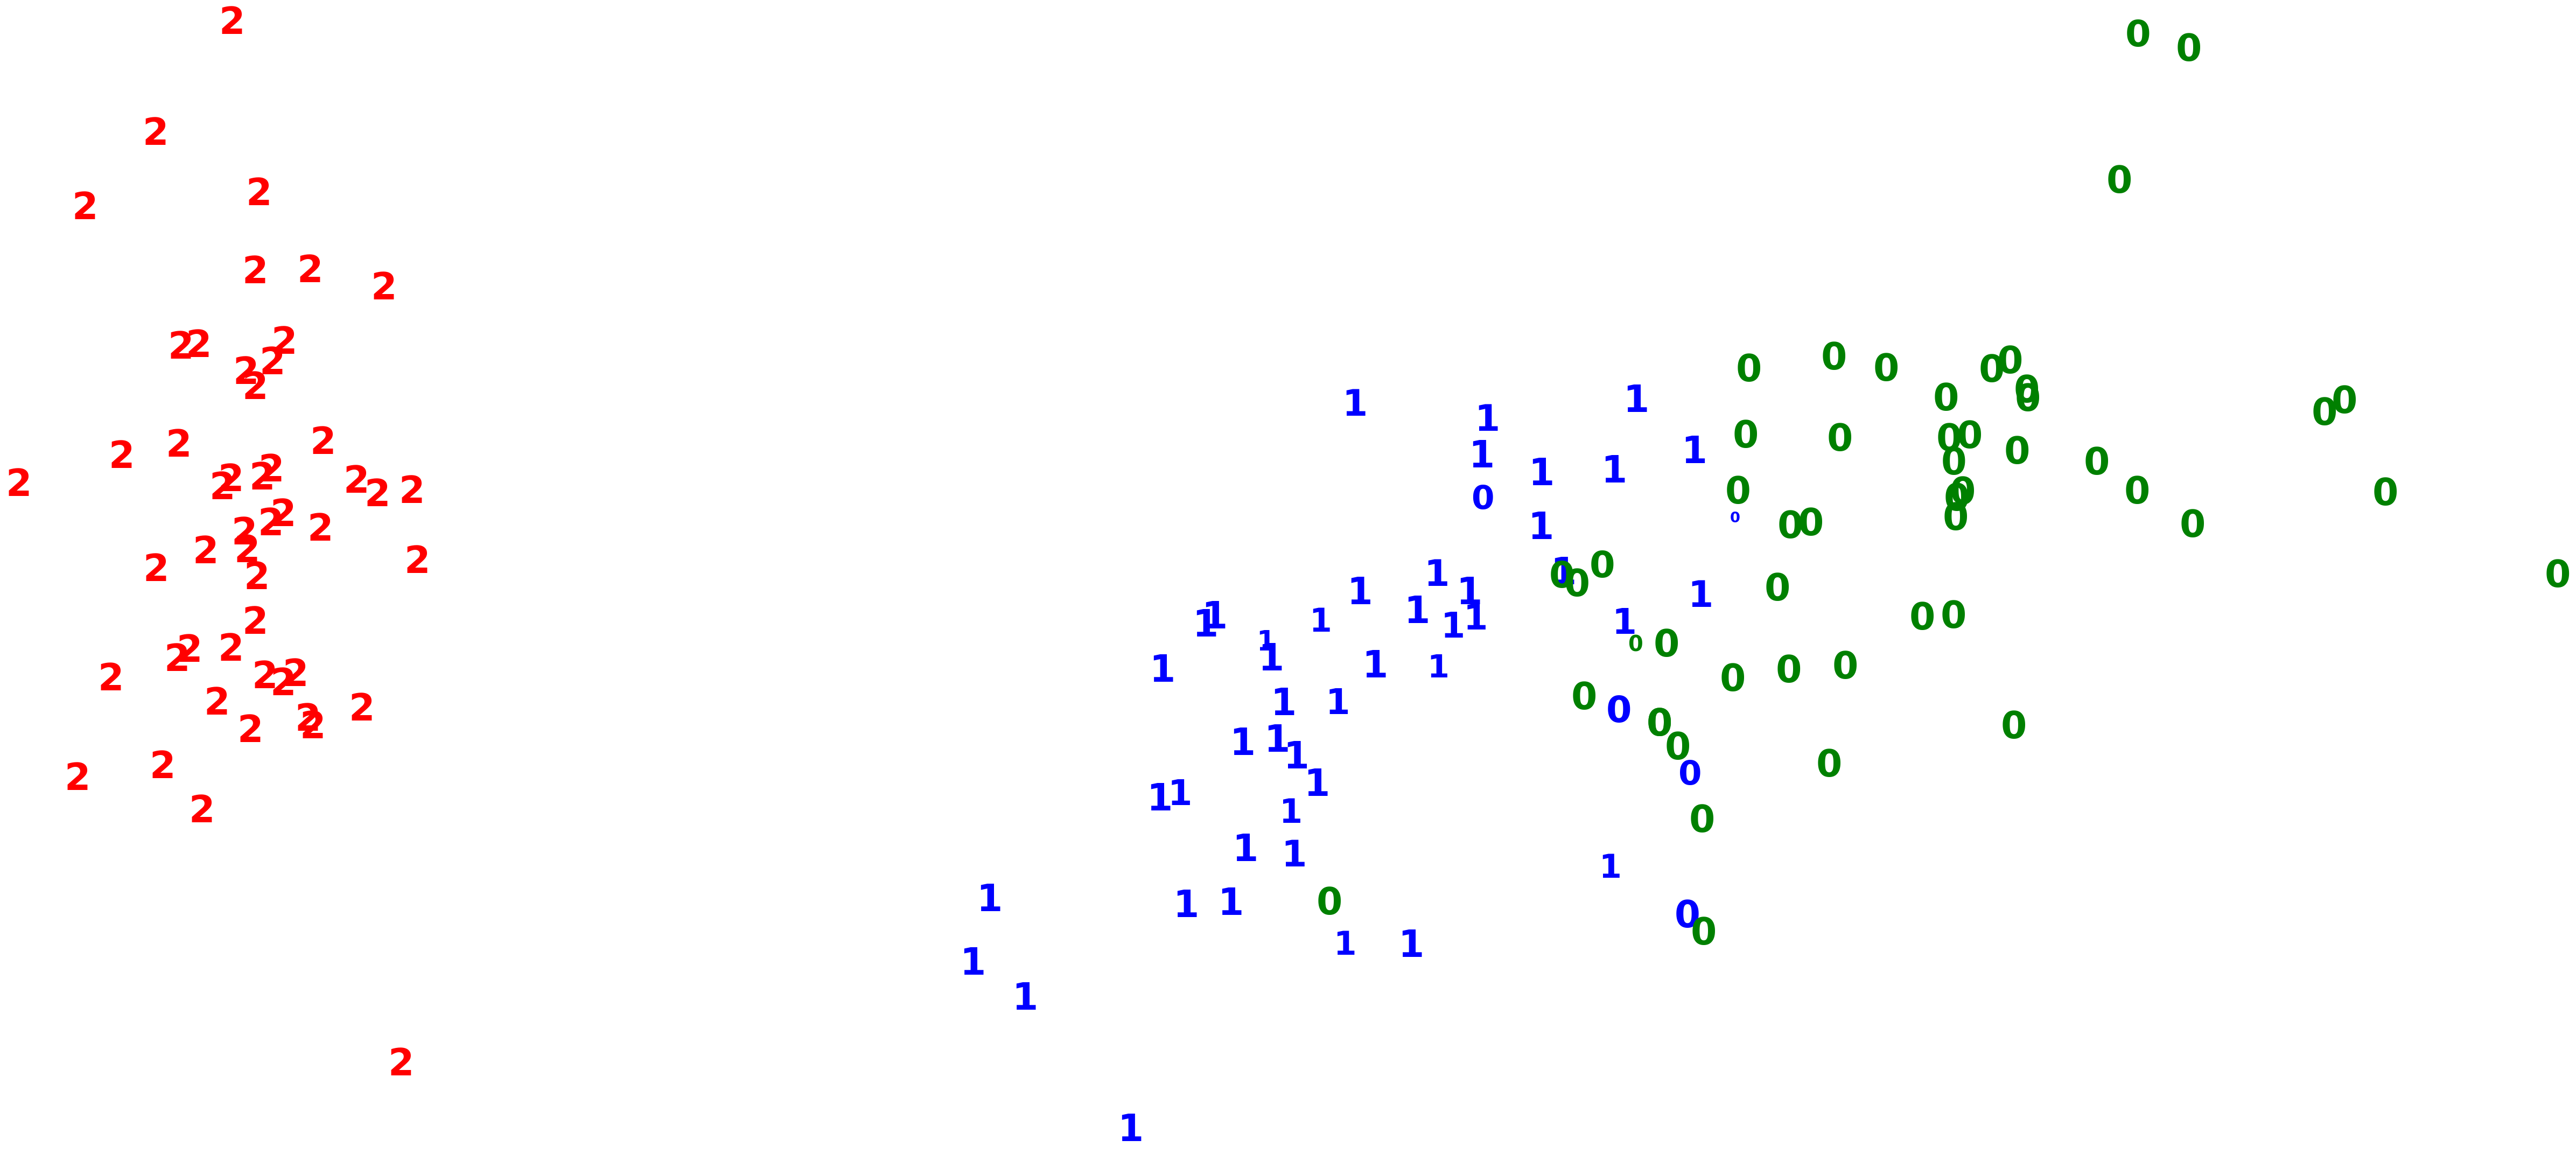

In [7]:
probs = gmm_cluster.predict_proba(X_std)

size = 50 * probs.max(1) ** 2  # Squaring emphasizes differences

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': size[i]}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

As you might expect, the probabilities assigned to the observations of the different classes that are very close to each other are relatively low. And the more isolated observations are assigned relatively high probabilities.

#Q1.  Continue working with the [heart disease dataset](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) from the UC Irvine Machine Learning Repository.

Load the dataset from Thinkful's database.

In [8]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, text

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

with engine.begin() as conn:
    query = text("""SELECT * FROM heartdisease""")
    heart_disease_df = pd.read_sql_query(query, conn)

# no need for an open connection, as we're only doing a single query
engine.dispose()

Apply data preprocessing.

In [9]:
# Define the features and the outcome
X = heart_disease_df.iloc[:, :13]
y = heart_disease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize y so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0,1, 0)

# Standardize the data.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### Q1(a). Apply GMM to the heart disease dataset by setting `n_components=2`. Get ARI and silhouette scores for your solution and compare it with those of the k-means and hierarchical clustering solutions that you implemented in the previous lesson assessments. Which algorithm performs best?

In [12]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

print("ARI score: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI score: 0.18389186035089963
Silhouette score: 0.13628813153331445


Both the ARI and silhouette scores are significantly lower than that of those with k-means and hierarchical clustering.

### Q1(b). GMM implementation of scikit-learn has a parameter called `covariance_type`. This parameter determines the type of covariance parameters to use. There are four types that you can specify:

- `full`: This is the default. Each component has its own general - covariance matrix.
- `tied`: All components share the same general covariance matrix.
- `diag`: Each component has its own diagonal covariance matrix.
- `spherical`: Each component has its own single variance.

Try all of these. Which one performs best in terms of ARI and silhouette scores?

In [15]:
covariance_types = ['full','tied','diag','spherical']

for i,cov_type in enumerate(covariance_types):
  # Defining the agglomerative clustering
  gmm_cluster = GaussianMixture(n_components=2, random_state=123,covariance_type=covariance_types[i])

  # Fit model
  clusters = gmm_cluster.fit_predict(X_std)

  print("ARI score with covariance_type={}: {}".format(
      covariance_types[i],metrics.adjusted_rand_score(y, clusters)))

  print("Silhouette score with covariance_type={}: {}".format(
      covariance_types[i],metrics.silhouette_score(X_std, clusters, metric='euclidean')))
  print()


ARI score with covariance_type=full: 0.18389186035089963
Silhouette score with covariance_type=full: 0.13628813153331445

ARI score with covariance_type=tied: 0.18389186035089963
Silhouette score with covariance_type=tied: 0.13628813153331445

ARI score with covariance_type=diag: 0.18389186035089963
Silhouette score with covariance_type=diag: 0.13628813153331445

ARI score with covariance_type=spherical: 0.20765243525722468
Silhouette score with covariance_type=spherical: 0.12468753110276873



The ARI score of `covariance_type=spherical` is higher than the others but its silhouette score is lower than the others. The scores of the other covariance types are nearly the same.